# Discriminative Models for Classification
We will now see some representatives from a very important category of classifiers: discriminative models. These classifiers aim to **learn a direct mapping from input features to class labels**. This is done by explicitly modeling a decision boundary separating the data.

While **not all discriminative models are probabilistic**, probabilistic discriminative classifiers usually obtain classification by modeling *directly* the conditional probability distribution:

$$P(Y|X)$$

where $X$ is the random variable containing the input observation and $Y$ is the random variable containing the associated class. Since $Y$ is discrete nad a finite number of $M$ classes, once we model this conditional probability, we can easily classify an observation $\mathbf{x}$ using the following function:

$$h(\mathbf{x}) = \arg_c \max P(Y=c|X=\mathbf{x})$$

This is easily done by computing the above conditional probability for all values $c=0, \ldots, M-1$ keeping $\mathbf{x}$ fixed and keeping the class $c$ which gives the largest probability value.

## The Logistic Regressor as a Discriminative Classifier
A logistic regressor can be seen as a binary classifier which classifies an input vector $\mathbf{x}$ into one of two classes $\{0,1\}$. Recall that a logistic regressor is defined as follows:

$$P(y=1|\mathbf{x}) = \sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)$$

While this model outputs a probability value, we can easily threshold the output probability value to obtain classifications:

$$h(\mathbf{x}) = \begin{cases} 1 & \text{if} & \sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n) \geq 0.5 \\ 0 & \text{otherwise}&\end{cases}$$

It can be seen that optimizing the logistic regressor as we have seen in previous lectures corresponds to minimize the empirical risk for a given loss function penalizing incorrect predictions.

As previously mentioned, discriminative classifiers explicitly model the decision boundary. We have already seen that in the case of a logistic regressor, the decision boundary is defined as follows:

$$P\left(y=1 | \mathbf{x} \right) = 0.5 \Leftrightarrow e^{- (\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \ldots + \beta_{n} x_n)} = 1 \Leftrightarrow 0 = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \ldots + \beta_n x_n$$

Hence, the decision boundary will be a hyperplane:

$$\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \ldots + \beta_n x_n$$

For instance, in two dimensions it will be a line, as discussed previously and also reported in the following example:

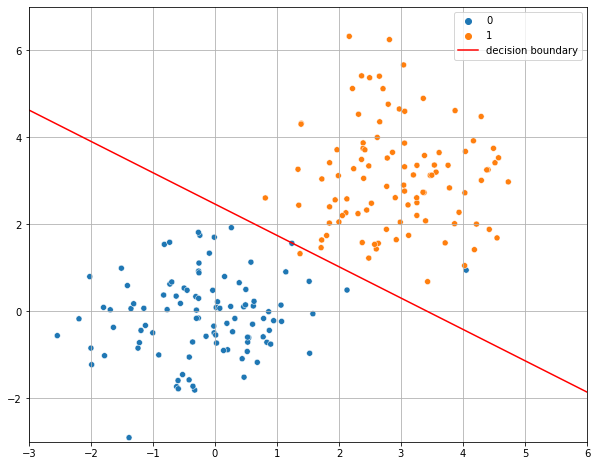

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

x=np.array(list(np.random.normal(0,1,100))+list(np.random.normal(3,1,100)))
y=np.array(list(np.random.normal(0,1,100))+list(np.random.normal(3,1,100)))
l=np.array([0]*100+[1]*100)

lr = LogisticRegression()
lr.fit(np.vstack([x,y]).T,l)
xx = np.linspace(-3,6)
yy = -lr.coef_[0][0]/lr.coef_[0][1]*xx-lr.intercept_/lr.coef_[0][1]
plt.figure(figsize=(10,8))
sns.scatterplot(x=x,y=y,hue=l)
plt.xlim([-3,6])
plt.ylim([-3,7])
plt.plot(xx,yy,'r', label='decision boundary')
plt.legend()
plt.grid()
plt.show()

### Multinomial and Softmax Regressors as Discriminative Multi-Class Classifiers
Similarly, we can see the multinomial and softmax regressors as multi-class classifiers, i.e., classifiers when the number of classes is larger than 2. Recall that a multinomial classifier can be used to predict probabilities with the following formulas:

$$ P(Y=k|X=\mathbf{x}) = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{1+\sum_{l=2}^K \mathbf{e^{\beta_l^T\mathbf{X}}}}$$
$$ P(Y=1|X=\mathbf{x}) = \frac{1}{1+\sum_{l=2}^K \mathbf{e^{\beta_l^T\mathbf{X}}}}$$

In a softamx regressor, probabilities can instead be predicted with the following formula:

$$ P(Y=k|X=\mathbf{x}) = \frac{e^{\mathbf{\beta_k}^T\mathbf{X}}}{\sum_{l=1}^K \mathbf{e^{\beta_l^T\mathbf{X}}}}, \ \ \ \forall k=1,\ldots,K$$

Similarly to the case of logistic regression, we can then define a classification function as follows:

$$h(\mathbf{x}) = \underset{k}{\mathrm{arg\ max}}\ P(Y=k|X=\mathbf{x})$$

In practice, we select the class which **maximizes the estimated conditional probability $P(Y=k|X=\mathbf{x})$**.

## K-Nearest Neighbor Classification

The logistic regressor is a parametric model: tts performance depends on the accurate choice of the parameters. Similarly to density estimation methods, parametric models have the advantage to be compact, but they make assumptions on the data. For instance, the logistic regressor assumes that **data is linearly separable**. A different approach to classification consists in the use of non-parametric models, which use the dataset as a support to make their predictions making very few assumptions on the nature of the data.

The most popular non-parametric classification model is certainly the nearest neighbor algorithm, which is introduced in this section.

### The Nearest Neighbor (or 1-NN) Classification Algorithm

Given an observation $\mathbf{x}$, the basic principle of Nearest Neighbor classification is to look at the nearest example in the training set and assign the same class. The idea is that nearby elements in the representation space will likely be similar. Consider the following example in which each data point is an email:

![](/_static/lecture_specific/classification/knn1.png)

What would be the class of the new example (the red cross)?

Looking at the plot above, we notice that, while the test example is not exactly equal to any training example, it is still
reasonably similar to **some training examples** (i.e., there are points
nearby in the Euclidean space).

Since the training and test sets have been collected in similar ways
(e.g., both contain spam and legitimate e-mails), we can hypothesize
that the *test example will be of the same class of similar examples
belonging to the training set*.

For instance, if two documents have similar word frequencies, they are
probably of the same class (e.g., if both contain the words "viagra" and
"sales" many times, they probably belong to "spam" class).

We can measure how "similar" two examples $\mathbf{x}$ and $\mathbf{x}$'
are using a suitable distance function $d$:

$$d(\mathbf{x},\mathbf{x}^{\mathbf{'}})$$

We expect similar examples to have a small distance. *A very common
choice for* $d$ *is the Euclidean distance*:

$$d\left( \mathbf{x,}\mathbf{x}^{\mathbf{'}} \right) = \left\| \mathbf{x -}\mathbf{x}^{\mathbf{'}} \right\|_{2} = \sqrt{\sum_{i = 1}^{N}\left( x_{i} - x_{i}^{'} \right)^{2}}$$

We can hence define a classifier which leverages our intuition
**assigning to a test example** $\mathbf{x}^{\mathbf{'}}$**the class of
the closest example in the training set**:

$$f\left( \mathbf{x}^{\mathbf{'}} \right) = \arg_{y}{\min{\{ d\left( \mathbf{x}^{\mathbf{'}}\mathbf{,\ x} \right)|\left( \mathbf{x},y \right) \in TR\}}}$$

Here we are using the $argmin$ function. The expression
$\arg_{y}{\min\left\{ f(y) \right\}}$ is defined as the value of $y$
which minimizes $f(y)$. We can see it as a function which searches for
the value of the index $y$ leading to the global minimum of function
$f(y)$.

This algorithm is referred to as the **nearest neighbor algorithm (or
1-NN as we will see in its generalization in a moment)**. In practice,
given a test example $\mathbf{x}^{\mathbf{'}}$, the nearest neighbor
algorithm works in two steps:

-   Find the element $\overline{\mathbf{x}}$ of the training set with
    the smallest distance with $\mathbf{x'}$ (i.e., such that
    $d(\overline{\mathbf{x}},\mathbf{x}^{\mathbf{'}})$ is minimum). The
    element $\overline{\mathbf{x}}$ is called the nearest neighbor of
    $\mathbf{x}^{'}$.

-   Return the ground truth label associated to $\overline{\mathbf{x}}$,
    i.e., $y\ |\ \left( \overline{\mathbf{x}},y \right) \in TR$.

In the example above, the test observation will be assigned the "spam"
class, as shown in the following figure:

![](/_static/lecture_specific/classification/knn2.png)

### The K-Nearest Neighbour Classification Algorithm

The Nearest Neighbor (or 1-NN) algorithm assumes that data points of the
same class are close to each other in the representation space. This can
be reasonably true when the representation space is ideal for the
classification task and the data is *clean and simple enough*. For
instance, we expect similar documents to have similar word frequencies.

However, it is often common to have **'outliers'** in the training data,
i.e., data points which do not closely follow the distribution of the
other data points. This can be due to different factors:

-   *The data may not be clean*: maybe an email has been wrongly
    classified as "spam" when it's actually not spam;

-   *The data representation may not be ideal*: there could be
    legitimate email in which the word "viagra" is used and there are
    many orthographical errors. *Think of a legitimate email forwarding
    a spam email*. Our simple representation does not account for that,
    which leads to outliers.

Let us consider as an outlier a **legitimate e-mail containing the word
'viagra'**. This example can be seen graphically as follows:

![](/_static/lecture_specific/classification/knn3.png)


Let us now assume that we are presented with a test example which is
shown as a red cross in the following figure:

![](/_static/lecture_specific/classification/knn4.png)


In the example above, the nearest neighbor algorithm would classify the
test example (the red cross) as "non spam" since the closest point is
the green outlier, while it is clear that the example is most probably a
"spam" e-mail. Indeed, while the closest example is "non spam", all
other examples nearby belong to the "spam" class.

Reasonably, in cases like this, **we should not look just at the closest
point in space**, but instead, we should look at a **neighborhood** of
the data point. Consider the following example:

![](/_static/lecture_specific/classification/knn5.png)

If we look at a sufficiently large neighborhood, we find that most of
the points in the neighborhood are actually spam! Hence, it is wiser to
classify the data point as belonging to the spam class, rather than to
the non-spam one.

In practice, setting an appropriate radius for the neighborhood is not
easy. For instance, if the space is not uniformly dense (and usually it
is not -- as in the example above!), a given radius could lead to
neighborhoods containing different numbers of elements. Indeed, in some
cases, they may even include just zero elements. Hence, rather than
considering a neighborhood of a given radius, **we consider
neighborhoods of the point containing **at most $\mathbf{K}$ elements**, where $\mathbf{K}$ **is a *hyper-parameter* of the
algorithm**.

Similarly to what we have defined in the case of density estimation, given a point $\mathbf{x'}$, we will define the neighborhood of
training points of size $K$ centered at $\mathbf{x'}$ as follows:

$$N_K(\mathbf{x'}) = N(\mathbf{x'},R_K(\mathbf{x'}))$$

where $N(x,r)$ denotes a neighborhood centered at $x$ and with radius $r$, and:

$$R_K(\mathbf{x'}) = \sup \{r : |N(\mathbf{x'},r) \setminus \{\mathbf{x'}\}| \leq K\}$$

Finally, we define the K-Nearest Neighbor Classification Algorithm (also
called K-NN) as follows:

$$f\left( \mathbf{x'} \right) = mode\{ y|\left( \mathbf{x},y \right) \in N\left( \mathbf{x'};TR,\ K \right)\}$$

Where $mode$ is the "statistical mode" function, which returns the
**most frequent element of a set**.

$\mathbf{K}$ **is in practice an hyperparameter of the algorithm**. It
can be set to some arbitrary value or optimized using a **validation set
or cross-validation**.

We should note that this definition **generalizes the nearest neighbor
algorithm defined before**. Indeed, a 1-NN is exactly the nearest
neighbor classifier seen above.



### K-NN as density estimation
The K-NN algorithm can be seen in terms of density estimation. This also allows to turn the algorithm into a probabilistic approach, also estimating conditional probabilities as a softmax regressor.

Let $C_k$ denote class $k$. Suppose our training set contains exactly $N$ points and $N_k$ points of class $k$, then:

$$N = \sum_k N_k$$

To classify point $\mathbf{x}$ we consider a neighborhood centered at $\mathbf{x}$ and containing exactly $K$ points. We will denote as $K_k$ the number of points in the neighborhood belonging to class $k$, then:

$$K = \sum_k K_k$$

Recall that we defined K-NN density estimation as follows:

$$P(\mathbf{x}) = \frac{K}{N} \cdot \frac{1}{V}$$

Where $N=|\mathbf{X}|$ is the cardinality of the dataset $\mathbf{X}$ and $V = V_d \cdot R_k^d(\mathbf{x})$ is the volume of the neighborhood centered around $\mathbf{x}$. We can apply this principle to **estimate the density of points of class $k$ as follows**:

$$P(\mathbf{x}|C_k) = \frac{K_k}{N_k} \cdot \frac{1}{V}$$

We can define the prior class probability as follows:

$$P(C_k) = \frac{N_k}{N}$$

We can now apply Bayes' theorem to obtain the posterior probability:

$$P(C_k|\mathbf{x}) = \frac{P(\mathbf{x}|C_k)P(C_k)}{P(\mathbf{x})} = \frac{\frac{K_k}{N_k} \cdot \frac{1}{V} \frac{N_k}{N}}{\frac{K}{N}\cdot \frac{1}{V}} = \frac{K_k}{N} \cdot \frac{N}{K} = \frac{K_k}{K}$$

Note that once we are able to estimate the posterior probability, we can define the following classification function:

$$h(\mathbf{x}) = \underset{k}{\mathrm{arg\ max}}\ P(C_k|\mathbf{x}) = \underset{k}{\mathrm{arg\ max}}\ N_k $$

Which corresponds to the K-NN principle.

### Classification Map/Decision Boundary Of K-NN and Importance of Parameter K

A classifier $f$ assigns a class to each input $\mathbf{x}$. Since
$\mathbf{x}$ can be seen as a geometrical point in the $n$-dimensional
space, it is generally interesting to see how the classification
function $f$ works on a portion of the representation space. This is
done by generating a **classification map** or **decision boundary**,
which is obtained computing the label that the classifier would assign
to a dense grid of data points.

As an example, consider the following plot which displays the examples
of the Fisher Iris datasets according to two of the four features (sepal
length and sepal width):

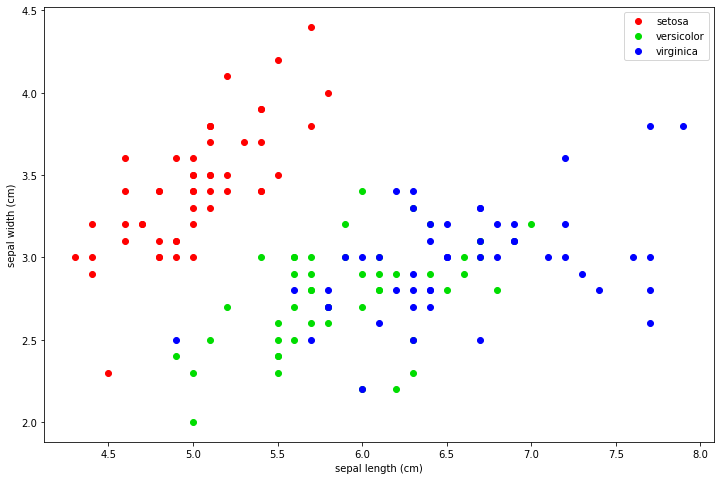

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                        np.linspace(y_min, y_max, 500))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00DD00', '#0000FF'])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))

# Plot also the training points
plt.scatter(X[y==0, 0], X[y==0, 1], color='#FF0000', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], color='#00DD00', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], color='#0000FF', label=iris.target_names[2])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.axis('tight')
plt.show()

In the plot above, points of different colors represent the data points
belonging to the three classes of the dataset. We can obtain a
classification map by computing the label which we would obtain for each
point of the input representation space. Examples of classification maps
for a 1-NN, a 5-NN, a 10-NN, and a 20-NN classifiers are shown below:



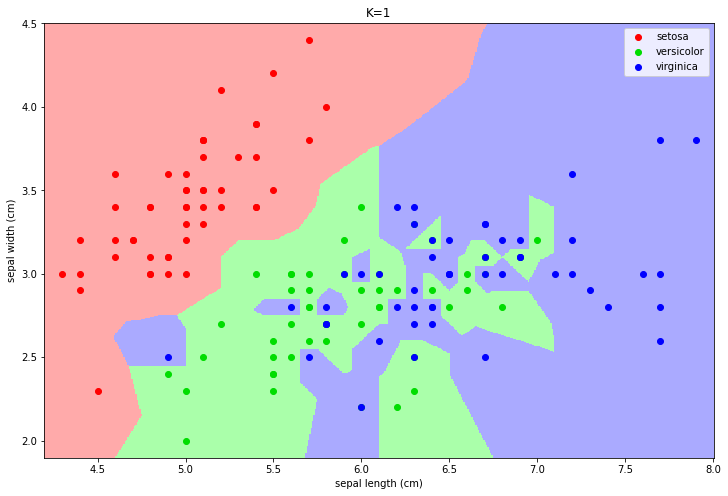

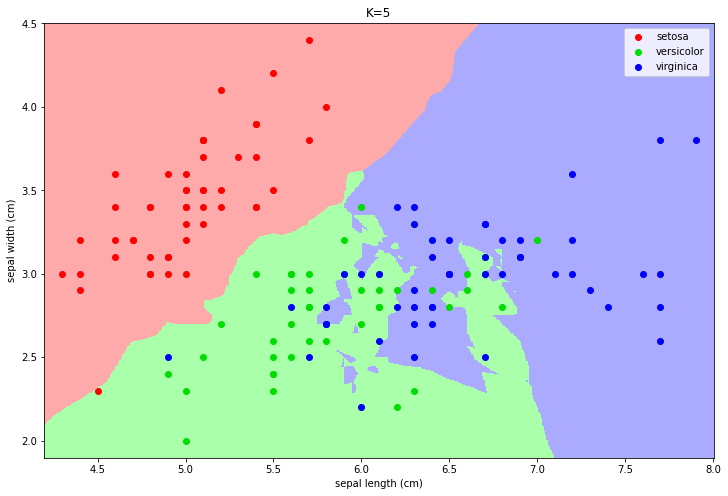

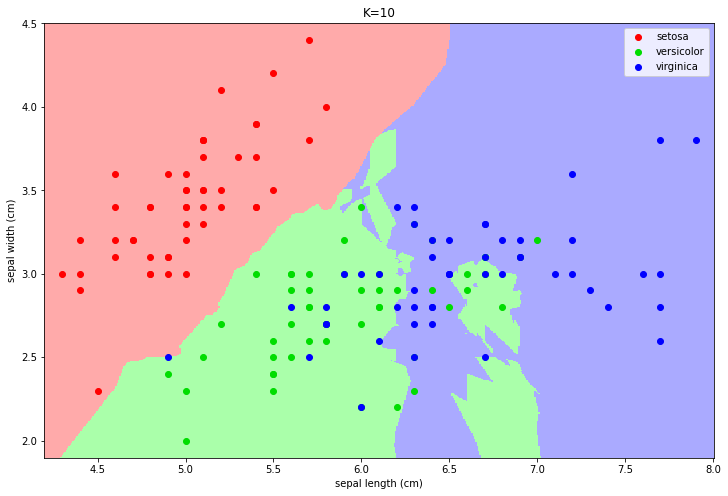

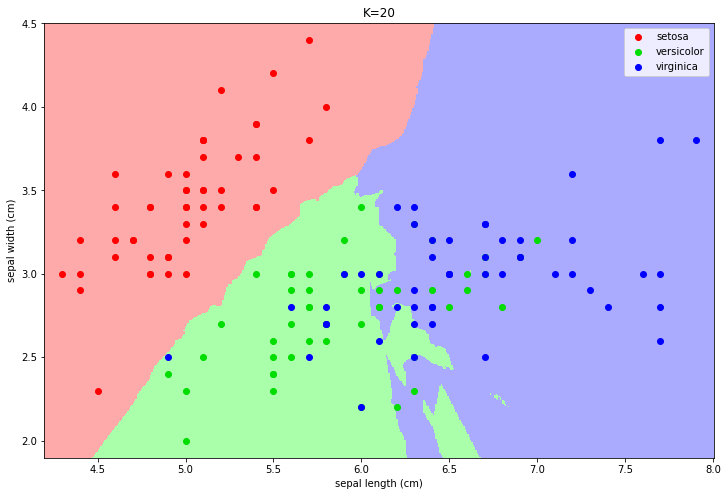

In [ ]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00DD00', '#0000FF'])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[y==0, 0], X[y==0, 1], color='#FF0000', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], color='#00DD00', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], color='#0000FF', label=iris.target_names[2])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title('K=1')
plt.axis('tight')

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[y==0, 0], X[y==0, 1], color='#FF0000', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], color='#00DD00', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], color='#0000FF', label=iris.target_names[2])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.legend()
plt.title('K=5')

plt.show()


knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[y==0, 0], X[y==0, 1], color='#FF0000', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], color='#00DD00', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], color='#0000FF', label=iris.target_names[2])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.legend()
plt.title('K=10')

plt.show()

knn = neighbors.KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[y==0, 0], X[y==0, 1], color='#FF0000', label=iris.target_names[0])
plt.scatter(X[y==1, 0], X[y==1, 1], color='#00DD00', label=iris.target_names[1])
plt.scatter(X[y==2, 0], X[y==2, 1], color='#0000FF', label=iris.target_names[2])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.legend()
plt.title('K=20')

plt.show()




In practice, the function "breaks" the space into areas related to a
given class. The number of neighbors changes the decision map:

-   For small values, the algorithm tends to over-segment the space and
    creates very small regions for isolated training data-points.

-   For larger values, the regions tend to be smoother and isolated data
    points are ignored.

-   Choosing **a larger K** **can** reduce overfitting (indeed the
    isolated data-points can be seen as outliers).

-   However, choosing a **too large K** can encourage underfitting, by
    completing ignoring some of the decision regions.

-   In particular, setting **K to the size of the training set**, any
    data point is classified with the most numerous class.


## Discriminant Functions and Fisher's Linear Discriminant
A broad class of discriminative classifier is that of discriminant functions. While discriminant functions can also be non-linear, we will focus only on linear discriminant functions. In the case of two classes, a linear discriminant function takes the following form:

$$y(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0$$

where $\mathbf{w}$ is called a weight vector and $w_0$ is called a bias term. Note that this formulation is identical to the one of a linear regressor. An input vector is assigned to one of the two classes (say class $1$) if $y(\mathbf{x}) \geq 0$ and to the other class ($say $0$) otherwise. In practice, we can define the following classification function:

$$h(\mathbf{x}) = \begin{cases} 1 & \text{if} & y(\mathbf{x}) \geq 0 \\ 0 & \text{otherwise} & \end{cases}$$

The **decision boundary of the classifier** (i.e., the set of points of maximum uncertainty) is hence defined by 

$$y(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0 = 0$$

which is a (D-1)-dimensional hyperplane in the D-dimensional space. When $\mathbf{x} \in \Re^2$, the decision boundary is the line of equation:

$$a x_1 + b x_2 + c = 0$$

dividing the space into two areas, as illustrated in the following figure:

![](/_static/lecture_specific/classification/discriminant.png)

In the case of $K$ classes, we define $K$ different one-dimensional linear discriminant functions:

$$y_k(\mathbf{x}) = \mathbf{w}_k^T \mathbf{x} + w_{k0}$$

Note that this can also be seen as projecting the D-dimensional point $\mathbf{x}$ to $K-1$ dimensions. We will then assign a point $\mathbf{x}$ to class $C_k$ if:

$$y_k(\mathbf{x}) > y_j(\mathbf{x})\ \forall j \neq k$$ 

Hence our classification function can be defined as:

$$h(\mathbf{x}) = \arg_k\max y_k(\mathbf{x})$$

The decision boundary between classes $k$ and $j$ is defined by:

$$y_k(\mathbf{x}) = y_j(\mathbf{x}) \Rightarrow (\mathbf{w}_k - \mathbf{w}_j)^T \mathbf{x} + (w_{k0}-w_{j0}) = 0$$

Not that this is again a D-1 dimensional hyperplane in the D-dimensional space. For instance in 2D, it will be a line. The multi-class classification will be hence performed by dividing the space into different regions, as shown in the following:

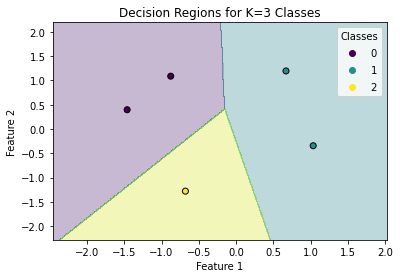

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# Generate synthetic data for three classes
X, y = make_classification(n_samples=5, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot class samples
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
legend = plt.legend(*scatter.legend_elements(), title="Classes")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for K=3 Classes')
plt.show()


### Fisher's Linear Discriminant (FLD)
There are different ways to construct discriminant functions. In this context, we will focus on Fisher's Linear Discriminant, a technique to **reduce the dimensionality of the data to support classification**.

While FLD does not directly lead to a discriminant function, it allows to **map the data to a lower-dimensional space in which building discriminant functions is much easier**.

More specifically, FLD allows finding a linear transformation that maps a set of data divided into $K$ classes into a $K-1$ dimensional space where the data is maximally separable. For example, in the case of binary classification, the data will be projected into a one-dimensional space where they are separable. 

**FLD has similarities with Principal Component Analysis (PCA)** as both aim to map data into a subspace with certain characteristics. However, there are two fundamental differences:
- PCA is an **unsupervised method**, meaning it does not require providing any labels (class membership of the data). FLD, on the other hand, is a **supervised method** as it uses labels to find the data projection that makes them separable.
- When applying PCA, we specify the number of components in the target space. FLD always projects the data into a space of dimension $K-1$, where $K$ is the number of classes.

### Fisher's Linear Discriminant for Two Classes
The original formulation of the Fisher Linear Discriminant focuses on the case in which the data is divided into two classes. 

Let $\{x_i\}_{i=1}^N$ be a set of $D$-dimensional observations divided into two classes $C_1$ and $C_2$ such that $x_i \in C_1 \lor x_i \in C_2$. 

We want to find a linear transformation of the data into a one-dimensional space:

$$y(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$$

where $\mathbf{x}$ is a $D$-dimensional observation, $\mathbf{w}$ is a $D$-dimensional vector called the **weight vector**, and $y(\mathbf{x})$ is the projection onto one dimension of $\mathbf{x}$ (thus, $y(\mathbf{x})$ is a scalar). If the found projection maximizes the separability of the data, we only need to find a threshold $w_0$ and classify:

$$h(\mathbf{x}) = \begin{cases} C_1 & \text{if} & y(\mathbf{x}) \geq w_0\\
C_2 &\text{if}& y(\mathbf{x}) < w_0\end{cases}$$

Let's first see how to find the parameters $\mathbf{w}$ that maximize the separability of the projected data. Consider the means of the data belonging to the two classes:

$$\mathbf{m}_1 = \frac{1}{N_1} \sum_{x_i \in C_1} x_i, \ \ \ \ \ \ \ \ \mathbf{m}_2 = \frac{1}{N_2} \sum_{x_i \in C_2} x_i,$$

where $N_1$ is the number of elements belonging to class $C_1$, and $N_2$ is the number of elements belonging to class $C_2$. The simplest measure of separability between the classes would be the distance between the means of the classes calculated on the projected data:

$$m_1 = \mathbf{w}^T\mathbf{m}_1, \ m_2 = \mathbf{w}^T\mathbf{m}_2$$
$$m_2 - m_1 = \mathbf{w}^T(\mathbf{m}_2-\mathbf{m}_1)$$


To maximize the quantity $m_2-m_1$, we introduce the constraint that $\mathbf{w}$ is a unit vector ($\mathbf{w}^T\mathbf{w}=1$). We need to maximize:

$$\mathbf{w}^T (\mathbf{m}_2-\mathbf{m}_1) \text{ subject to } \mathbf{w}^T\mathbf{w}=1$$

This can be converted to the following form using the method of Lagrangian multipliers:

$$\mathbf{w}^T (\mathbf{m}_2-\mathbf{m}_1) + \lambda (1-\mathbf{w}^T\mathbf{w})$$

Setting the derivative with respect to $\mathbf{w}$ equal to zero, it can be shown that a solution is given by:

$$\mathbf{w}^* = \frac{\mathbf{m}_2-\mathbf{m}_1}{||\mathbf{m}_2-\mathbf{m}_1||}$$


This solution, however, does not guarantee that the data will be separable, as the data in the different classes can have arbitrary variances, as illustrated in this figure:

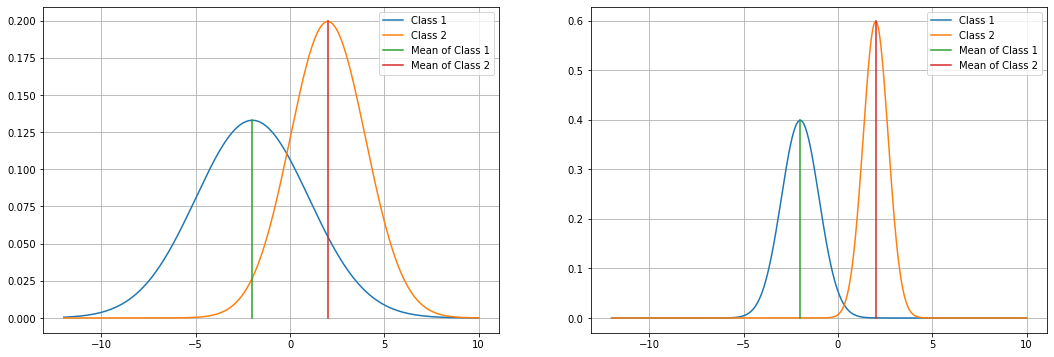

In [6]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
plt.figure(figsize=(18,6))
plt.subplot(121)
g1 = norm(-2,3)
g2 = norm(2,2)

x=np.linspace(-12,10,500)
plt.plot(x,g1.pdf(x))
plt.plot(x,g2.pdf(x))
plt.plot([-2,-2],[0,g1.pdf(-2)])
plt.plot([2,2],[0,g2.pdf(2)])
plt.legend(['Class 1','Class 2','Mean of Class 1', 'Mean of Class 2'])
plt.grid()

plt.subplot(122)
g3 = norm(-2,1)
g4 = norm(2,2/3)
plt.plot(x,g3.pdf(x))
plt.plot(x,g4.pdf(x))
plt.plot([-2,-2],[0,g3.pdf(-2)])
plt.plot([2,2],[0,g4.pdf(2)])
plt.legend(['Class 1','Class 2','Mean of Class 1', 'Mean of Class 2'])
plt.grid()
plt.show()

Indeed, as we can see, classes in the right plot are more separable, despite the classes having the same means in the left and right plots.

In addition to maximizing the distance between means, we also want to minimize the variances of the data belonging to individual classes, given by:

$$s_k^2 = \sum_{\mathbf{x}_i \in C_k} (y(\mathbf{x}_i) - m_k)^2, \ k=1,2$$

To **maximize the distance between transformed means** and **minimize the variances of the transformed data**, the Fisher criterion is defined as follows:

$$J(\mathbf{w}) = \frac{(m_2-m_1)^2}{s_1^2+s_2^2}$$

By maximizing $J(\mathbf{w})$ with respect to $\mathbf{w}$, we achieve both objectives:
  * Maximize $(m_2-m_1)$ in the numerator;
  * Minimize $s_1^2+s_2^2$ in the denominator.

It can be shown that the Fisher criterion can be explicitly expressed as a function of $\mathbf{w}$:


$$J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S}_B\mathbf{w}}{\mathbf{w}^T \mathbf{S}_W\mathbf{w}}$$

Where $\mathbf{S}_B$ is the **between-class covariance matrix** and is given by:


$$\mathbf{S}_B = (\mathbf{m}_2-\mathbf{m}_1)(\mathbf{m}_2-\mathbf{m}_1)^T$$

and $\mathbf{S}_W$ is the total **within-class covariance matrix** and is given by:

$$\mathbf{S}_W = \sum_{\mathbf{x}_i \in C_1}(\mathbf{x}_i-\mathbf{m}_1)(\mathbf{x}_i-\mathbf{m}_1)^T + \sum_{\mathbf{x}_i \in C_2}(\mathbf{x}_i-\mathbf{m}_2)(\mathbf{x}_i-\mathbf{m}_2)^T$$


In can be shown that the quantity $J(\mathbf{w})$ is maximized by:

$$\mathbf{w}\propto\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})$$

With a possible solution given by:

$$\mathbf{w}^* = \frac{\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})}{||\mathbf{S}^{-1}_{W}(\mathbf{m_2}-\mathbf{m_1})||}$$

Notice that if the between-class covariance matrix is diagonal, the found solution is equivalent to maximizing only $\mathbf{m}_2-\mathbf{m}_1$.


Once the optimal projection $\mathbf{w}$ is found, we can project the data using $y(\mathbf{x})=\mathbf{w}^T\mathbf{x}$. Therefore, we need to find the threshold $y_0$ to classify the data using the discriminant $y(x)\geq y_0$. The optimal threshold $y_0$ can be found by modeling the data of the two classes using two Gaussians and determining the point where they intersect.

### Fisher Linear Discriminant Example and Geometrical Interpretation
As in the case of PCA, the expression

$$y(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$$

projects the data into the unit vector $\mathbf{w}$. Hence, in the case of two classes, FLD **finds a direction along which to project the data so that it maintains maximum separability**. Note that, while PCA was unsupervised (no labels were needed), FLD make uses of labels to chooses the direction of maximum separability.

Let us consider the following data from the breast cancer dataset:

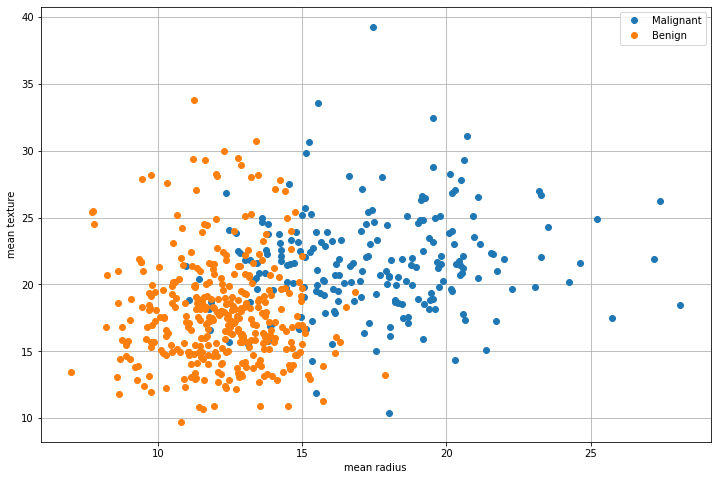

In [7]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()
X = bcancer.data[:,np.array([0,1])].T 
C = bcancer.target 
#X=X[:,::2]
#C=C[::2]
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')
plt.legend(['Malignant','Benign'])
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
plt.grid()
plt.show()

Fisher's Linear Discriminant allows to find a vector $\mathbf{w}$ such that, if we project the data along that vector, the two classes are maximally separable, as shown in the plot below:

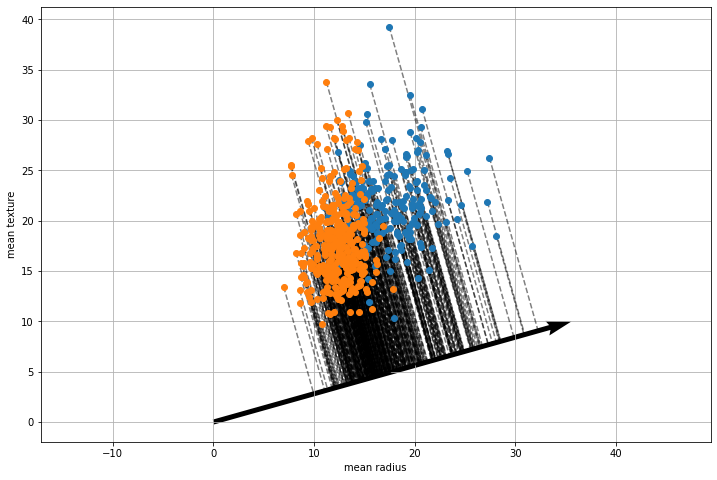

In [8]:
from scipy.linalg import inv
SW = np.cov(X[:,C==0]) + np.cov(X[:,C==1])
m1 = X[:,C==0].mean(1)
m2 = X[:,C==1].mean(1)

w = inv(SW).dot((m2-m1))
w=w/np.sqrt((w**2).sum())

plt.figure(figsize=(12,8))

for i in range(X.shape[1]):
    x = X[:,i]
    p = np.dot(x, w) / np.dot(w, w) * w
    plt.plot([x[0],p[0]],[x[1],p[1]],'--k',alpha=0.5)

for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o')

plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 10; x2 = 20;
#y1 = -w[0]/w[1]*x1+y0/w[1]
#y2 = -w[0]/w[1]*x2+y0/w[1]
#plt.plot([x1,x2],[y1,y2],'r')
plt.quiver(0,0,-w[0],-w[1],scale=1.8)

plt.axis('equal')
#plt.legend(['Malignant','Benign','Projection Direction $\mathbf{w}$'],loc=2)
plt.grid()
plt.show()

We can hence project the data along the found direction, **mapping each element to a real-valued number**. The plot below shows the histograms of the scores of points belonging to the two classes:

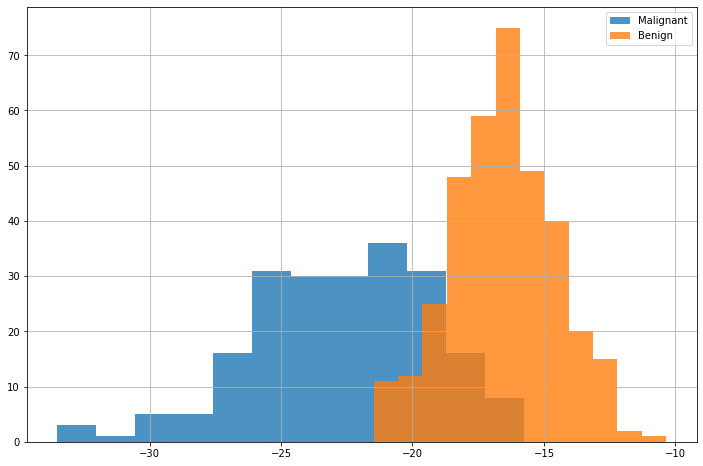

In [9]:
Y=w.T.dot(X)

plt.figure(figsize=(12,8))
plt.hist(Y[C==0],alpha=0.8,bins=12)
plt.hist(Y[C==1],alpha=0.8,bins=12)
plt.legend(['Malignant','Benign'])
plt.grid()
plt.show()


We now have **a score-based classifier**, which could be directly **evaluated using an ROC curve**. If we want to output a prediction, we need to find an appropriate threshold. One way to do it is through a grid search on the training set. If we plot the accuracy of the classification model with respect to the threshold, we obtain the following curve:

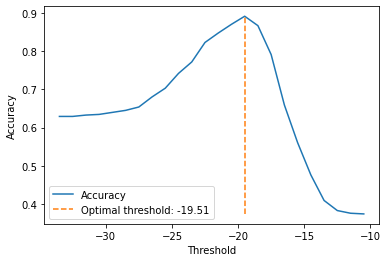

In [37]:
acc = []

tresh = np.arange(Y.min(), Y.max())
for t in tresh:
    pred = (Y>t).astype(int)
    acc.append((pred==C).mean())

acc = np.array(acc)

y0 = tresh[np.argmax(acc)]
plt.plot(tresh, acc, label="Accuracy")
plt.plot([opt, opt], [acc.min(),acc.max()], '--', label=f'Optimal threshold: {y0:0.2f}')

plt.xlabel('Threshold')
plt.ylabel("Accuracy")

plt.legend()
plt.show()
    

We can now set $w_0 = -19.51$ and obtain our discriminant function:

$$y(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0$$

We know that the decision boundary of the classifier will be given by:

$$\mathbf{w}^T \mathbf{x} + w_0 = 0$$

This is a line perpendicular to the direction found by FLD, as shown in the following plot:

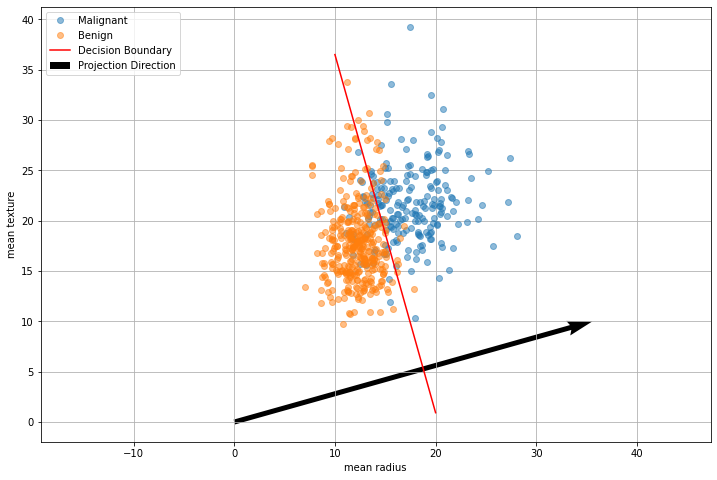

In [38]:
plt.figure(figsize=(12,8))
for c in range(2):
    plt.plot(X[0,C==c],X[1,C==c],'o',alpha=0.5)
plt.xlabel(bcancer.feature_names[0])
plt.ylabel(bcancer.feature_names[1])
x1 = 10; x2 = 20;
y1 = -w[0]/w[1]*x1+y0/w[1]
y2 = -w[0]/w[1]*x2+y0/w[1]
plt.plot([x1,x2],[y1,y2],'r')
plt.quiver(0,0,-w[0],-w[1],scale=1.8)
plt.axis('equal')
plt.legend(['Malignant','Benign','Decision Boundary','Projection Direction'],loc=2)
plt.grid()
plt.show()

Alternatively to manually finding a threshold, we could train another classifier on top of these features - for instance, a logistic regressor.

### Fisher's Linear Discriminant for More than $2$ Classes

When we have $K>2$ classes and the data dimensionality $D$ is larger than $K$ ($D>K$), the FLD will project the data into $D'$ new linear features

$$y_k = \mathbf{w}_k^T \mathbf{x}$$

where $k=1, \ldots, D'$. Conveniently, we can group the $y_k$ real values to obtain a $D'$-dimensional vector $\mathbf{y}$. We can also consider the weight matrix $\mathbf{W}$ in which the vectors $\mathbf{w}_i$ are columns:

$$\mathbf{W} = (\mathbf{w_1}, \mathbf{w_2}, \ldots, \mathbf{w_k})$$

We hence have:

$$\mathbf{y} = \mathbf{W}^T \mathbf{x}$$

Similarly to FLD in the case of two classes, we are not including any bias or threshold. Also in this case, FLD is a dimensionality reduction technique rather than a true discriminant function.

The formulation of the Fisher's Linear Discriminant in this case is similar to the case of $2$ classes. We define the within-class covariance matrix as follows:

$$\mathbf{S}_W = \sum_{k=1}^K \mathbf{S}_k$$

Where $\mathbf{S}_k$ is the covariance matrix of data belonging to class $C_k$:

$$\mathbf{S}_k = \sum_{i \in C_k} (\mathbf{x}_i - \mathbf{m}_k) (\mathbf{x}_i - \mathbf{m}_k)^T$$

and $\mathbf{m}_k$ are the individual classes' means:

$$\mathbf{m}_k = \frac{1}{N_k} \sum_{i \in C_k} \mathbf{x}_i$$

The between-class covariance matrix is defined as:

$$\mathbf{S}_B = \sum_{k=1}^K N_k (\mathbf{m}_k - \mathbf{m})(\mathbf{m}_k - \mathbf{m})^T$$

where $\mathbf{m}$ is the mean of the overall dataset

$$\mathbf{m} = \frac{1}{N} \sum_{i=1}^N \mathbf{x}_i$$

and $N_k$ is the number of elements in class $C_k$. Intuitively, the between-class covariance matrix measures how much dispersed the means of the individual classes are with respect to the overall mean of the data.

These two quantities are associated to the same concepts computed on the transformed data:

$$\mathbf{s}_W = \sum_{k=1}^K \sum_{i \in C_k} (\mathbf{y}_n - \mathbf{\mu}_k) (\mathbf{y}_n - \mathbf{\mu}_k)^T$$

$$\mathbf{s}_B = \sum_{k=1}^K N_k (\mathbf{\mu}_k - \mathbf{\mu})(\mathbf{\mu}_k - \mathbf{\mu})^T$$

where $\mathbf{\mu}_k$ are the means of the projected data within each class, and $\mathbf{\mu}$ is the overall mean of the projected data:

$$\mathbf{\mu}_k = \frac{1}{N_k} \sum_{i \in C_k} \mathbf{y}_i$$

$$\mathbf{\mu} = \frac{1}{N} \sum_{k=1}^K N_k \mathbf{\mu}_k$$

To minimize within-class variability and maximize between-class variability, the following criterion is usually defined:

$$J(\mathbf{W}) = Tr\{\mathbf{s}_W^{-1}\mathbf{s}_B\}$$

We will not see the mathematical details of the formulation and optimization of this objective, but in practice the objective can be optimized to obtain $\hat{\mathbf{W}}$.

Similarly to PCA, when projecting data with FLD **we can choose a number of dimensions smaller than $K-1$**. Note that as in the case of two variables, FLD only provides a method to project data to a lower dimensional space. After this transformation is found, **we can fit a classifier in the new space**.

#### FLD with K classes - Example
As an example of the application of Fisher's Linear Discriminant, let us consider Fisher's Iris dataset. As we have already seen, the dataset contains four different features:

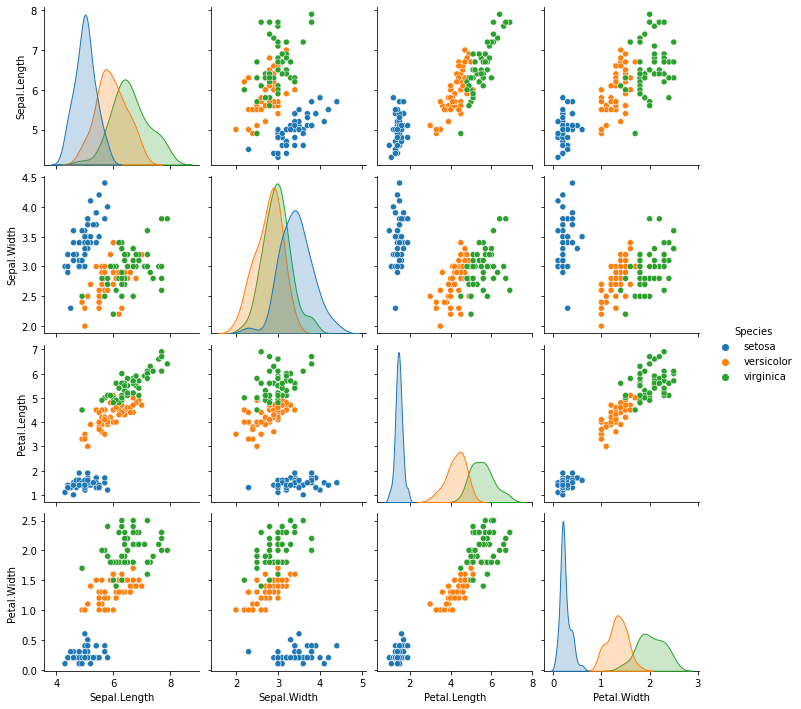

In [39]:
from statsmodels.datasets import get_rdataset
import seaborn as sns
iris = get_rdataset('iris').data

sns.pairplot(iris, hue='Species')
plt.show()


Since the data has $3$ classes, we can project the data to $2$ dimensions, where we try to maximize linear separability:

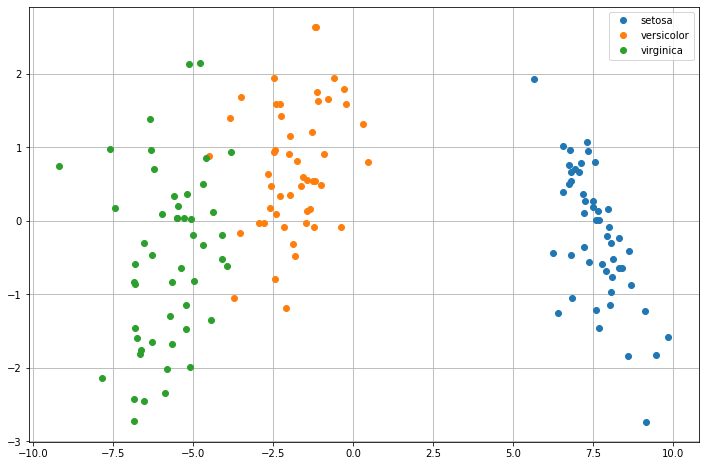

In [40]:
## NOTE: we are using LDA instead of FLD - this will lead to similar conclusions, but LDA and FLD are not exactly the same thing

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
plt.figure(figsize=(12,8))
lda = LDA()
lda.fit(iris.drop('Species',axis=1),iris.Species)
iris_lda=lda.transform(iris.drop('Species',axis=1))

classes = np.unique(iris['Species'])
for s in classes:
    class_data = iris_lda[iris['Species']==s]
    plt.plot(class_data[:,0],class_data[:,1],'o')
plt.grid()
plt.legend(classes)
plt.show()

As we can see, the data are now easier to linearly separate. As in the case of two classes, no thresholds have been determined. We can either find appropriate thresholds (e.g., with grid search) or train another classifier on top of these features.

## References

-  Nearest Neighbor: Section 2.5.2 of \[1\]
-  Fisher's Discriminant Analysis: Section 4.1.4 and Section 4.1.6 of \[1\]

\[1\] Bishop, Christopher M. *Pattern recognition and machine learning*.
springer, 2006.
<https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf>